<h1 style="text-align: center;">Desafío - Variables</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo del desafío: individual
- Para la realización del desafío necesitarás apoyarte del archivo `Apoyo Desafío - Variables.zip`, disponible en la <a href="https://empieza.desafiolatam.com/cohorts/2108/sections/79631/activities/120916/items/617715">plataforma</a>.

## Habilidades a evaluar
- Hacer uso de métodos de `pandas` para segmentar columnas y filas.
- Hacer uso de los métodos `iterrows` e `iteritems` para implementar loops en `pandas`.
- Implementar `enumerate` en loops.
- Conocer las principales convenciones en la visualización de resultados en histogramas, gráficos de punto y barras.
- Generar simulaciones de la distribución normal.
- Conocer las principales aplicaciones de las distribuciones.
- Calcular e interpretar puntajes z.

## Descripción
- La empresa en la cual usted trabaja tiene como solicitud el análisis del Índice de Desarrollo Humano (IDH) de diversos países para elaborar un informe para el Ministerio de Relaciones Exteriores, a fin de poder contar con la data necesaria para poder comenzar a trabajar en relaciones diplomáticas más estrechas con diversos países. Para ello, usted queda a cargo de poder revisar la base de datos "Quality of Government", de la Universidad de Gotemburgo.

- Las unidades de medición en esta base corresponden a **194 países**, recolectando los últimos datos de enero del 2018. Además, se le recuerda que la base de datos es un compendio de alrededor de 1900 variables, que miden las causas y consecuencias de un buen gobierno en materias económicas, salud pública, medio ambiente, salud institucional, corrupción, entre otras.

## Requerimientos
A continuación, revisaremos los requerimientos y acciones que el Ministerio de RREE te pide realizar.

### 1. Genere una muestra de casos (1 punto). Para ello debes considerar:

- Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria.
- Seleccione el 50% de los casos.
- Cada base generada debe contener los siguientes elementos:
    - El índice de desarrollo humano (`undp_hdi`).
    - El nombre del país (`ccodealp`).
    - La región a la que pertenece (`ht_region`).
    - El PIB per cápita. (`gle_cgdpc`).
    - El total de la población (`imf_pop`).
    
- Si su **apellido está entre la A y la M**, escoja las siguientes variables del módulo **Educación**:
    - `ffp_hf`: Human Flight and Brain Drain.
    - `wef_qes`: Quality of the educational system.
    - `wdi_expedu`: Government expenditure on education, total (% of GDP).
    - `wdi_ners`: School enrollment, secondary (% net).

- Si su **apellido está entre la N y la Z**, escoja las siguientes variables del módulo **Salud**:
    - `wef_imort`: Infant mortality, deaths/1000 live births.
    - `who_alc2000`: Alcohol consumption per capita (2000-).
    - `who_tobt`: Current smoking of any tobacco product (Total).
    - `wdi_exph`: Government expenditure on health, total (% of GDP).

- Guarde esta tabla procesada en un nuevo objeto.
- Renombre las categorías de la variable `ht_region` de números a nombres de regiones, según la siguiente recodificación:

<table>
  <tr>
    <th>Código Región</th>
    <th>Nombre Región</th>
  </tr>
  <tr>
    <td>1</td>
    <td>EastEurope</td>
  </tr>
  <tr>
    <td>2</td>
    <td>LatAm</td>
  </tr>
  <tr>
    <td>3</td>
    <td>NorthAfrica</td>
  </tr>
  <tr>
    <td>4</td>
    <td>SubSaharian</td>
  </tr>
  <tr>
    <td>5</td>
    <td>WesternDem</td>
  </tr>
  <tr>
    <td>6</td>
    <td>EastAsia</td>
  </tr>
  <tr>
    <td>7</td>
    <td>SouthEastAsia</td>
  </tr>
  <tr>
    <td>8</td>
    <td>SouthAsia</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Pacific</td>
  </tr>
  <tr>
    <td>10</td>
    <td>Caribbean</td>
  </tr>
</table>

In [57]:
# Utilice esta celda para importar los módulos necesarios e instanciar el DataFrame con los datos requeridos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importamos el csv
df = pd.read_csv('qog_std_cs_jan18.csv')
display(df.shape)

(194, 1882)

In [58]:
# Utilice esta celda para hacer la selección de datos solicitada y almacenar en nueva variable

#Obtenemos el 50% de los datos segun semilla
df_sample = df.sample(frac = 0.5, random_state=3909)

#Definimos las columnas a ocupar
columns_obligatorias = ['undp_hdi','ccodealp','ht_region','gle_cgdpc','imf_pop']
columns_apellido = ['ffp_hf','wef_qes','wdi_expedu','wdi_ners']

#Guardamos tabla filtrada
df_subset = df_sample[columns_obligatorias + columns_apellido]

In [59]:
# Utilice esta celda para realizar la recodificación de las regiones
import warnings
warnings.simplefilter('ignore') # ignora los warnings que aparecen, muy utiles para modelos

#Recodificamos la columna con la region
values = [1,2,3,4,5,6,7,8,9,10]
values_replace = ['EastEurope','LatAm','NorthAfrica','SubSaharian','WesternDem','EastAsia','SouthEastAsia','SouthAsia','Pacific','Caribbean']

df_subset['ht_region'] = df_subset['ht_region'].replace(values,values_replace)

### 2. Genere una función que ingrese su objeto y devuelva lo siguiente (2 puntos):
- Por cada variable existente en su objeto, calcule las medidas descriptivas para los casos continuos.
- Para cada variable discreta, que calcule la frecuencia.
- Reporte las estadísticas descriptivas para `gle_cgdpc`, `undp_hdi`, `imf_pop`.


In [60]:
# Utilice esta celda para definir la función
# Tips: categoricas = data[columns].describe(include=[object]); numericas = data[columns].describe(include=[np.number])

def fecth_descriptives(dataframe):
    """
        Objetivo:
            - Retornar las estadisticas descriptivas de un dataframe entregado
            
        Parámetros:
            - dataframe (dataframe): Dataframe que contine las variables para el resumen de estadistica descriptiva

        Retorno:
           - Retorna un frame el resumen de las variables entregadas
    """
    
    df_categoricas = dataframe.select_dtypes('object')
    df_numericas = dataframe.select_dtypes(np.number)
    
    display(df_numericas.describe())

    for columns, serie in df_categoricas.iteritems():
        display(serie.value_counts().to_frame())

In [61]:
# Utilice esta celda para realizar el llamado en las 3 variables solicitadas

fecth_descriptives(df_subset[['gle_cgdpc', 'undp_hdi', 'imf_pop']])

,gle_cgdpc,undp_hdi,imf_pop
count,95.000000,93.000000,74.000000
mean,18296.038379,0.716398,32.121270
std,20758.787608,0.161540,58.134566
min,324.160000,0.347000,0.034000
25%,3905.390050,0.604000,3.041250
50%,10944.540000,0.751000,8.342000
75%,26320.049500,0.845000,30.468250
max,108481.130000,0.948000,318.789001


**Compare las estadísticas con algún compañero. ¿Ve alguna diferencia sustancial en alguna de ellas?**

**Respuesta:** Se ven levemente diferentes el promedio y la desv. standart de gle_cgdpc y imf_pop.

### 3. Genere una función que liste las observaciones perdidas de una variable (2 puntos)
- La función debe contener los siguientes argumentos:
    - `dataframe`: La función debe ingresar un objeto DataFrame.
    - `var`: Variable a inspeccionar.
    - `print_list`: Opción para imprimir la lista de observaciones perdidas en la variable. Debe ser `False` por defecto.
    
- La función debe retornar la cantidad de casos perdidos y el porcentaje correspondiente.
- Cuando `print_list = True`, debe retornar la lista de casos.
- Analice todas las variables y sus casos perdidos.
- Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de países con ausencia de datos.

In [62]:
# Utilice esta celda para definir la función solicitada
# Tip: dataframe[var].isna()

def listar_nulos(dataframe, var, print_list = False):
    """
        Objetivo:
            - Retornar la cantidad de casos perdidos y el porcentaje correspondiente de estos, para una variable
            
        Parámetros:
            - dataframe (dataframe): Dataframe donde esta la variable a calcular
            - var (columna): Nombre de la columna para calcular
            - print_list (booleano): Se especifica si se quiere saber cuales son las regiones de la variable es nula. Por defecto es False

        Retorno:
           - Retorna un print con la candidad de nulos de la variable y el porcentaje correspondiente
    """

    perdidos = dataframe[var].isna()
    n_perdidos = perdidos.sum()
    porc_nulos = n_perdidos/perdidos.shape[0]
    lista_regiones = dataframe[perdidos]['ht_region'].unique().tolist()

    print(f'Cantidad de nulos de {var}: {n_perdidos}')
    print(f'Porcentaje de nulos de {var}: {porc_nulos}')

    if print_list == True:
        print(f'Las regiones donde {var} es nula son: {lista_regiones}\n')

In [63]:
# Utilice esta celda para realizar el llamado para todas las variables, con print_list=False. Puede usar un loop.
for variable in df_subset.columns:
    listar_nulos(df_subset, variable)

Cantidad de nulos de undp_hdi: 4
Porcentaje de nulos de undp_hdi: 0.041237113402061855
Cantidad de nulos de ccodealp: 0
Porcentaje de nulos de ccodealp: 0.0
Cantidad de nulos de ht_region: 0
Porcentaje de nulos de ht_region: 0.0
Cantidad de nulos de gle_cgdpc: 2
Porcentaje de nulos de gle_cgdpc: 0.020618556701030927
Cantidad de nulos de imf_pop: 23
Porcentaje de nulos de imf_pop: 0.23711340206185566
Cantidad de nulos de ffp_hf: 10
Porcentaje de nulos de ffp_hf: 0.10309278350515463
Cantidad de nulos de wef_qes: 22
Porcentaje de nulos de wef_qes: 0.2268041237113402
Cantidad de nulos de wdi_expedu: 24
Porcentaje de nulos de wdi_expedu: 0.24742268041237114
Cantidad de nulos de wdi_ners: 24
Porcentaje de nulos de wdi_ners: 0.24742268041237114


In [64]:
# Utilice esta celda para realizar el llamado para las 3 variables con más datos perdidos, mostrando la lista de países con ausencia de datos

for variable in ['wdi_ners', 'wdi_expedu', 'imf_pop']:
    listar_nulos(df_subset, variable, print_list = True)

Cantidad de nulos de wdi_ners: 24
Porcentaje de nulos de wdi_ners: 0.24742268041237114
Las regiones donde wdi_ners es nula son: ['SubSaharian', 'SouthEastAsia', 'WesternDem', 'NorthAfrica', 'EastEurope', 'Caribbean', 'EastAsia']

Cantidad de nulos de wdi_expedu: 24
Porcentaje de nulos de wdi_expedu: 0.24742268041237114
Las regiones donde wdi_expedu es nula son: ['SubSaharian', 'Pacific', 'NorthAfrica', 'Caribbean', 'WesternDem', 'EastEurope', 'EastAsia', 'LatAm']

Cantidad de nulos de imf_pop: 23
Porcentaje de nulos de imf_pop: 0.23711340206185566
Las regiones donde imf_pop es nula son: ['SubSaharian', 'WesternDem', 'LatAm', 'NorthAfrica', 'SouthAsia', 'Caribbean', 'EastEurope']



### 4. Grafique histogramas indicando medias muestral y total (2 puntos)
- Genere una nueva función que grafique un histograma de una variable entregada para un `DataFrame` de muestra. El gráfico debe además señalar las medias de la variable entregada, tanto para el `DataFrame` de muestra entregado, como para el `DataFrame` completo correspondiente.
- La función debe incluir los siguientes argumentos:
    - `sample_df`: La base de datos donde se encuentran los datos específicos (muestra).
    - `full_df`: La base de datos donde se encuentran todos los datos (contiene los datos de la muestra).
    - `var`: La variable a graficar.
    - `sample_mean`: Booleano. Si es verdadero, debe generar una recta vertical indicando la media de la variable en la selección muestral (sample_df). Por defecto debe ser False.
    - `true_mean`: Booleano. Si es verdadero, debe generar una recta vertical indicando la media de variable en la base de datos completa (full_df).
- Realice el llamado a la función para las 4 variables seleccionadas según su grupo.

In [65]:
# Utilice esta celda para definir la función

def plot_hist(sample_df, full_df, var, true_mean, sample_mean = False):
    """
        Objetivo:
            - Generar un histograma de una variable entregada para un Dataframe de muestra
            
        Parámetros:
            - sample_df (dataframe): Dataframe de muestra
            - full_df (dataframe): Dataframe completo
            - var (columna): Nombre de la columna a graficar en el histograma
            - true_mean (booleano): Se especifica si se desea mostrar el valor de la media de la columna entregada segun el dataset completo. Por defecto es True
            - sample_mean (booleano): Se especifica si se desea mostrar el valor de la media de la columna entregada segun el dataset de muestra. Por defecto es True

        Retorno:
           - Retorna un histograma con las medias especificadas
    """

    sample_var = sample_df[var].dropna()
    full_var = full_df[var].dropna()

    plt.hist(sample_var, color= 'blue', alpha = .4, label = var)

    if sample_mean == True:
        plt.axvline(sample_var.mean(), color = 'tomato', ls = '--', label = f'Media_Muestral de {var}')

    if true_mean == True:
        plt.axvline(full_var.mean(), color = 'blue', ls = '--', label = f'Meadia_Real de {var}')    

    plt.legend()

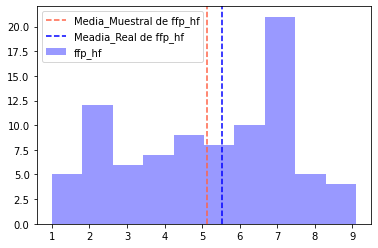

In [66]:
# Utilice esta celda para realizar el llamado para la primera variable

plot_hist(df_subset, df, 'ffp_hf', true_mean = True, sample_mean= True)

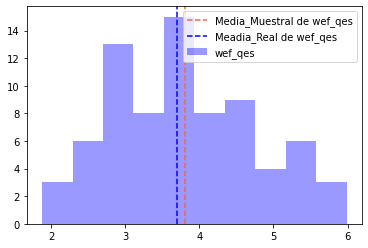

In [67]:
# Utilice esta celda para realizar el llamado para la segunda variable

plot_hist(df_subset, df, 'wef_qes', true_mean = True, sample_mean= True)

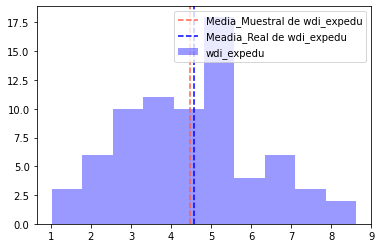

In [68]:
# Utilice esta celda para realizar el llamado para la tercera variable

plot_hist(df_subset, df, 'wdi_expedu', true_mean = True, sample_mean= True)

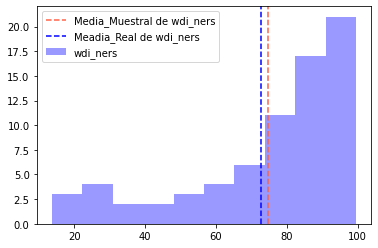

In [69]:
# Utiliza esta celda para realizar el llamado para la cuarta variable

plot_hist(df_subset, df, 'wdi_ners', true_mean = True, sample_mean= True)

**¿En qué variables la media de la muestra es mayor a la de los datos completos?**

**Respuesta:** Solo en dos casos, para la variable **`wef_qes`** y **`wdi_ners`**

### 5. Genere una función que devuelva un dotplot con las medias por región para una variable entregada (2 puntos)
- Cada "punto" del `dotplot` debe representar la media, o mediana, de una variable, para una región específica.
- La función debe contener los siguientes parámetros:
    - `dataframe`: La tabla de datos donde buscar las variables.
    - `plot_var`: Corresponde a una columna del dataframe entregado, de la cual se desea obtener la métrica (puede ser media o mediana).
    - `plot_by`: Corresponde a otra columna del dataframe entregado. Es la columna por la cual se quiere agrupar el dataframe, para acceder luego a la columna entregada en plot_var. _**Tip**_: Revise el uso del método `groupby` de `pandas`.
    - `statistic`: Debe presentar dos opciones; "mean" para la media y "median" para la mediana. Por defecto debe ser "mean".
    - `global_stat`: Booleano. Si es True, debe graficar la media (o mediana, según lo indicado en statistic) de la variable plot_var entregada, sin agrupar (para todos los datos entregados en dataframe). Por defecto debe ser `False`.

- Utilice la función en las 3 variables con una menor cantidad de datos perdidos.

In [70]:
# Utilice esta celda para definir la función

def dotplot(dataframe, plot_var, plot_by, statistic = 'mean', global_stat = False):
    """
        Objetivo:
            - Generar un dotplot de una variable entregada para un Dataframe
            
        Parámetros:
            - dataframe (dataframe): Dataframe donde se encuentra la columna a graficar
            - plot_var (columna): Nombre de la columna a graficar en el histograma
            - plot_by (columna): Nombre de la columna segun un filtro
            - statistic (string): Nombre de la estadistica a mostrar. Admite solo 2 valores posible: mean o median
            - global_stat (booleano): Se especifica si se desea mostrar el valor de la media de la columna entregada. Por defecto es True

        Retorno:
           - Retorna un histograma con las medias especificadas
    """
    
    medias = dataframe.groupby(plot_by)[plot_var].mean()
    medianas = dataframe.groupby(plot_by)[plot_var].median()

    if statistic =='mean' and global_stat == False:
        plt.plot(medias.values, medias.index, 'o', label= f'media de {plot_var}')

    if statistic =='median' and global_stat == False:
        plt.plot(medianas.values, medianas.index, 'o', label= f'mediana de {plot_var}')

    if statistic =='mean' and global_stat == True:
        plt.plot(medias.values, medias.index, 'o', label= f'media de {plot_var}')
        plt.axvline(dataframe[plot_var].mean(), color = 'tomato', ls = '--', label = f'media global de {plot_var}')

    if statistic =='median' and global_stat == True:
        plt.plot(medianas.values, medianas.index, 'o', label= f'mediana de {plot_var}')
        plt.axvline(dataframe[plot_var].mean(), color = 'tomato', ls = '--', label = f'mediana global de {plot_var}')
    
    plt.legend()

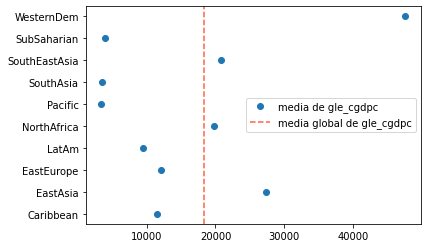

In [71]:
# Utilice esta celda para realizar el llamado para la primera variable

dotplot(df_subset,'gle_cgdpc', 'ht_region', statistic = 'mean', global_stat=True)

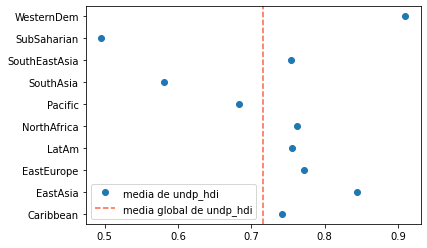

In [72]:
# Utilice esta celda para realizar el llamado para la segunda variable

dotplot(df_subset,'undp_hdi', 'ht_region', statistic = 'mean', global_stat=True)

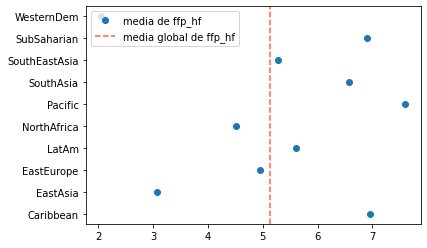

In [73]:
# Utilice esta celda para realizar el llamado para la tercera variable

dotplot(df_subset,'ffp_hf', 'ht_region', statistic = 'mean', global_stat=True)

### 6. Guarde la base de datos (1 punto)
- La submuestra creada tiene un método llamado `to_csv()`. Acceda a éste y guarde la base de datos con la siguiente nomenclatura:
    - `subsample_<iniciales>_demo.csv`

- Subir el archivo generado a la plataforma, junto al desafío

In [56]:
# Utilice esta celda para realizar el guardado del dataframe

iniciales = 'rb'
df_subset.to_csv(f'subsample_{iniciales}_demo.csv', index = False)